# Evaluación de la sostenibilidad financiera de proyectos de inversión en energías renovables.

In [41]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import yfinance as yf

In [3]:
df_CFE = yf.download("FCFE18.MX", start = "2023-07-01", end = "2025-04-01")
df_CFE.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,FCFE18.MX,FCFE18.MX,FCFE18.MX,FCFE18.MX,FCFE18.MX
Date,,,,,
2023-07-10,46.111851,46.111851,46.111851,46.111851,382
2023-07-11,46.111851,46.111851,46.111851,46.111851,0
2023-07-12,46.111851,46.111851,46.111851,46.111851,0
2023-07-13,46.111851,46.111851,46.111851,46.111851,0
2023-07-14,46.111851,46.111851,46.111851,46.111851,0


In [5]:
df_ICLN = yf.download("ICLN", start = "2008-06-01", end = "2025-04-01")
df_ICLN.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ICLN,ICLN,ICLN,ICLN,ICLN
Date,,,,,
2008-06-25,37.523689,37.673015,37.153927,37.153927,2000
2008-06-26,36.307732,42.664783,36.257956,42.664783,9800
2008-06-27,35.667767,36.115748,35.617991,36.115748,7700
2008-06-30,35.731762,36.236628,35.731762,36.101524,17100
2008-07-01,34.700703,35.553999,34.174505,35.553999,14900


In [6]:
df_COX = yf.download("COXA.MX", start = "2020-08-01", end = "2025-04-01")
df_COX.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,COXA.MX,COXA.MX,COXA.MX,COXA.MX,COXA.MX
Date,,,,,
2020-08-25,33.750000,33.750000,33.500000,33.500000,1033
2020-09-21,33.900002,33.900002,33.900002,33.900002,4980
2020-10-09,33.500000,33.500000,33.500000,33.500000,510763
2020-11-23,32.900002,32.900002,32.900002,32.900002,365
2020-11-25,31.799999,31.799999,31.799999,31.799999,209


In [7]:
df_SRE = yf.download("SRE", start = "1998-06-29", end = "2025-04-01")
df_SRE.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SRE,SRE,SRE,SRE,SRE
Date,,,,,
1998-06-29,5.425160,5.484516,5.306447,5.365804,12615000
1998-06-30,5.282704,5.401417,5.270833,5.401417,3075200
1998-07-01,5.294576,5.318318,5.152121,5.270833,1186200
1998-07-02,5.258962,5.270833,5.175863,5.270833,1127200
1998-07-06,5.163994,5.258964,5.152123,5.258964,1233600


In [8]:
df_CFE.columns = ['Cierre', 'Alto', 'Bajo', 'Apertura', 'Volumen']
df_ICLN.columns = ['Cierre', 'Alto', 'Bajo', 'Apertura', 'Volumen']
df_COX.columns = ['Cierre', 'Alto', 'Bajo', 'Apertura', 'Volumen']
df_SRE.columns = ['Cierre', 'Alto', 'Bajo', 'Apertura', 'Volumen']

In [17]:
rangos_CFE = pd.DataFrame({
    'Mínimo': df_CFE.min(),
    'Máximo': df_CFE.max()
})
rangos_CFE['Rango'] = rangos_CFE['Máximo'] - rangos_CFE['Mínimo']

print(rangos_CFE)

             Mínimo     Máximo         Rango
Cierre    39.373310       50.0  1.062669e+01
Alto      39.373310       50.0  1.062669e+01
Bajo      39.373308       50.0  1.062669e+01
Apertura  39.373308       50.0  1.062669e+01
Volumen    0.000000  1330778.0  1.330778e+06


In [18]:
rangos_ICLN = pd.DataFrame({
    'Mínimo': df_ICLN.min(),
    'Máximo': df_ICLN.max()
})
rangos_ICLN['Rango'] = rangos_ICLN['Máximo'] - rangos_ICLN['Mínimo']
print(rangos_ICLN)

               Mínimo        Máximo         Rango
Cierre       4.805717  3.752369e+01  3.271797e+01
Alto         4.852450  4.266478e+01  3.781233e+01
Bajo         4.774562  3.715393e+01  3.237937e+01
Apertura     4.852450  4.266478e+01  3.781233e+01
Volumen   1100.000000  2.513540e+07  2.513430e+07


In [19]:
rangos_COX = pd.DataFrame({
    'Mínimo': df_COX.min(),
    'Máximo': df_COX.max()
})
rangos_COX['Rango'] = rangos_COX['Máximo'] - rangos_COX['Mínimo']
print(rangos_COX)

          Mínimo         Máximo          Rango
Cierre      18.5      38.099998      19.599998
Alto        18.5      38.099998      19.599998
Bajo        18.5      38.099998      19.599998
Apertura    18.5      38.099998      19.599998
Volumen      0.0  510763.000000  510763.000000


In [20]:
rangos_SRE = pd.DataFrame({
    'Mínimo': df_SRE.min(),
    'Máximo': df_SRE.max()
})
rangos_SRE['Rango'] = rangos_SRE['Máximo'] - rangos_SRE['Mínimo']
print(rangos_SRE)

                Mínimo        Máximo         Rango
Cierre        3.556853  9.327382e+01  8.971697e+01
Alto          3.599219  9.425803e+01  9.065881e+01
Bajo          3.427827  9.285061e+01  8.942278e+01
Apertura      3.546483  9.405135e+01  9.050486e+01
Volumen   93400.000000  2.951370e+07  2.942030e+07


In [23]:
df_CFE["Tendencia"] = "Estable"
df_ICLN["Tendencia"] = "Estable"
df_COX["Tendencia"] = "Estable"
df_SRE["Tendencia"] = "Estable"

In [22]:
df_CFE["Diferencia"] = df_CFE["Cierre"] - df_CFE["Apertura"]
df_ICLN["Diferencia"] = df_ICLN["Cierre"] - df_ICLN["Apertura"]
df_COX["Diferencia"] = df_COX["Cierre"] - df_COX["Apertura"]
df_SRE["Diferencia"] = df_SRE["Cierre"] - df_SRE["Apertura"]

In [24]:
df_CFE.loc[df_CFE["Diferencia"] > 0, "Tendencia"] = "Subida"
df_CFE.loc[df_CFE["Diferencia"] < 0, "Tendencia"] = "Bajada"
df_CFE

In [28]:
df_ICLN.loc[df_ICLN["Diferencia"] > 0, "Tendencia"] = "Subida"
df_ICLN.loc[df_ICLN["Diferencia"] < 0, "Tendencia"] = "Bajada"
df_ICLN

,Cierre,Alto,Bajo,Apertura,Volumen,Tendencia,Diferencia
Date,,,,,,,
2008-06-25,37.523689,37.673015,37.153927,37.153927,2000,Subida,0.369762
2008-06-26,36.307732,42.664783,36.257956,42.664783,9800,Bajada,-6.357052
2008-06-27,35.667767,36.115748,35.617991,36.115748,7700,Bajada,-0.447981
2008-06-30,35.731762,36.236628,35.731762,36.101524,17100,Bajada,-0.369762
2008-07-01,34.700703,35.553999,34.174505,35.553999,14900,Bajada,-0.853297
...,...,...,...,...,...,...,...
2025-03-25,11.680000,11.730000,11.640000,11.640000,2222100,Subida,0.040000
2025-03-26,11.530000,11.670000,11.470000,11.600000,1551100,Bajada,-0.070001
2025-03-27,11.530000,11.600000,11.460000,11.460000,1628200,Subida,0.070000


In [27]:
df_COX.loc[df_COX["Diferencia"] > 0, "Tendencia"] = "Subida"
df_COX.loc[df_COX["Diferencia"] < 0, "Tendencia"] = "Bajada"
df_COX

,Cierre,Alto,Bajo,Apertura,Volumen,Tendencia,Diferencia
Date,,,,,,,
2020-08-25,33.750000,33.750000,33.500000,33.500000,1033,Subida,0.25
2020-09-21,33.900002,33.900002,33.900002,33.900002,4980,Estable,0.00
2020-10-09,33.500000,33.500000,33.500000,33.500000,510763,Estable,0.00
2020-11-23,32.900002,32.900002,32.900002,32.900002,365,Estable,0.00
2020-11-25,31.799999,31.799999,31.799999,31.799999,209,Estable,0.00
...,...,...,...,...,...,...,...
2024-12-05,33.000000,33.000000,31.900000,31.900000,20779,Subida,1.10
2025-01-30,31.500000,31.500000,31.500000,31.500000,366,Estable,0.00
2025-02-13,33.000000,33.000000,31.500000,31.500000,12451,Subida,1.50


In [26]:
df_SRE.loc[df_SRE["Diferencia"] > 0, "Tendencia"] = "Subida"
df_SRE.loc[df_SRE["Diferencia"] < 0, "Tendencia"] = "Bajada"
df_SRE

,Cierre,Alto,Bajo,Apertura,Volumen,Tendencia,Diferencia
Date,,,,,,,
1998-06-29,5.425160,5.484516,5.306447,5.365804,12615000,Subida,0.059356
1998-06-30,5.282704,5.401417,5.270833,5.401417,3075200,Bajada,-0.118712
1998-07-01,5.294576,5.318318,5.152121,5.270833,1186200,Subida,0.023742
1998-07-02,5.258962,5.270833,5.175863,5.270833,1127200,Bajada,-0.011871
1998-07-06,5.163994,5.258964,5.152123,5.258964,1233600,Bajada,-0.094970
...,...,...,...,...,...,...,...
2025-03-25,69.110001,70.260002,68.769997,70.260002,4456100,Bajada,-1.150002
2025-03-26,70.769997,70.980003,69.300003,69.349998,5304600,Subida,1.419998
2025-03-27,70.059998,70.720001,69.919998,70.500000,4412700,Bajada,-0.440002


In [33]:
from google.colab import drive
drive.mount("/content/drive")

ruta = '/content/drive/MyDrive/Colab Notebooks/Datos_Energias.xlsx'

with pd.ExcelWriter(ruta) as writer:
    df_CFE.to_excel(writer, sheet_name='CFE', index=False)
    df_ICLN.to_excel(writer, sheet_name='ICLN', index=False)
    df_COX.to_excel(writer, sheet_name='COX', index=False)
    df_SRE.to_excel(writer, sheet_name='SRE', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
def graf_info(df, color_numerico='#1f77b4', color_categoria='#ff7f0e'):
    for col in df.columns:
        plt.figure(figsize=(6, 4))

        if pd.api.types.is_numeric_dtype(df[col]):
            # Histograma con color personalizado
            sns.histplot(df[col].dropna(), kde=True, bins=20, color=color_numerico)
            plt.title(f'Histograma: {col}')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')

        elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':
            # Gráfico de barras con color personalizado
            df[col].value_counts().plot(kind='bar', color=color_categoria)
            plt.title(f'Frecuencia: {col}')
            plt.xlabel(col)
            plt.ylabel('Conteo')

        plt.tight_layout()
        plt.show()

# Datos CFE

In [37]:
print(df_CFE.describe())

           Cierre        Alto        Bajo    Apertura       Volumen  \
count  433.000000  433.000000  433.000000  433.000000  4.330000e+02   
mean    44.713565   44.745954   44.617352   44.627001  6.901492e+03   
std      3.157832    3.140738    3.188094    3.191069  7.433226e+04   
min     39.373310   39.373310   39.373308   39.373308  0.000000e+00   
25%     41.500000   41.500000   41.500000   41.500000  0.000000e+00   
50%     45.000000   45.000000   45.000000   45.000000  0.000000e+00   
75%     45.130745   45.130745   45.130745   45.130745  0.000000e+00   
max     50.000000   50.000000   50.000000   50.000000  1.330778e+06   

       Diferencia  
count  433.000000  
mean     0.086563  
std      0.629288  
min     -2.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      5.000000  


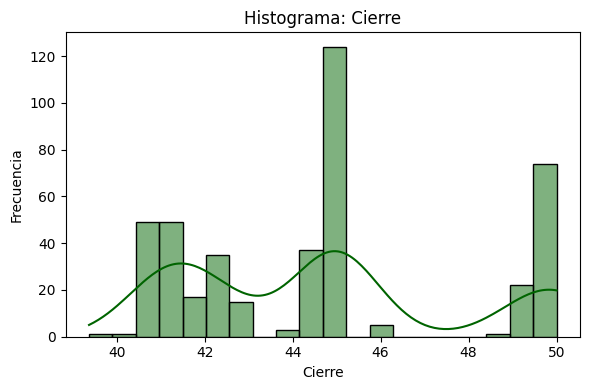

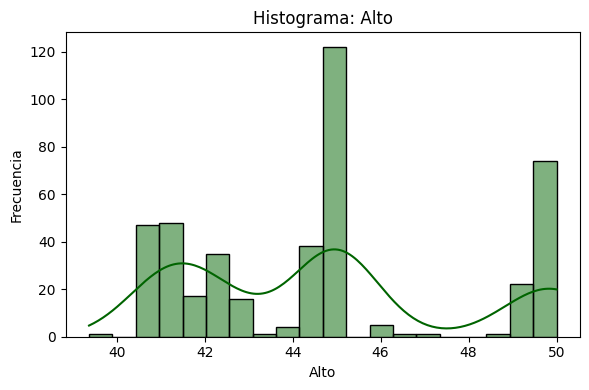

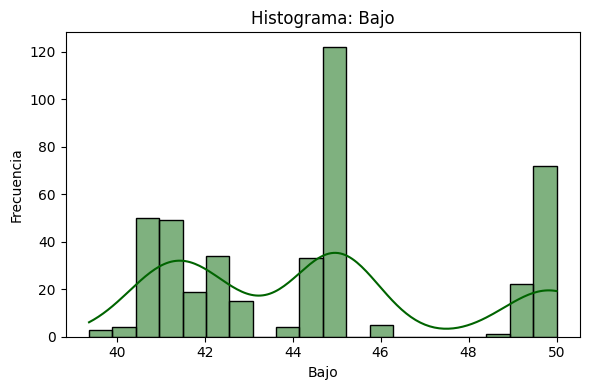

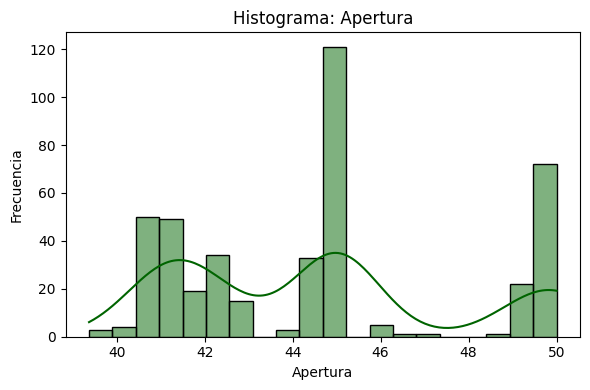

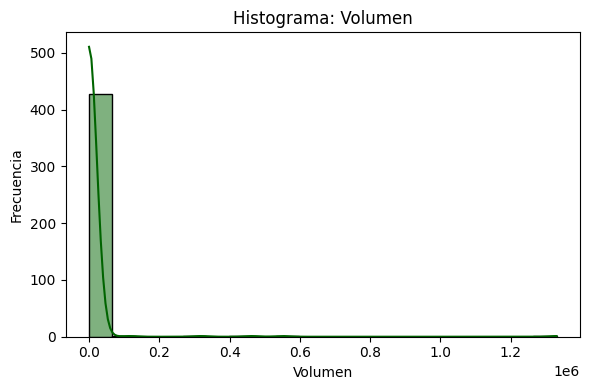

<ipython-input-53-c44803a6e0f0>:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':


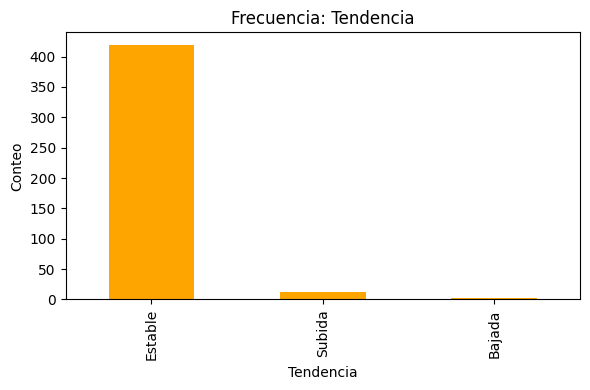

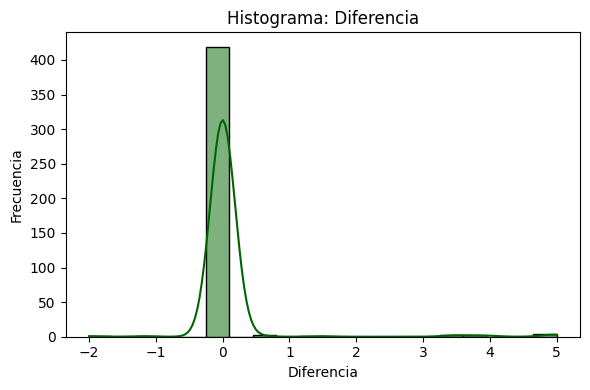

In [54]:
graf_info(df_CFE, 'darkgreen', 'orange')

#iShares Global Clean Energy

In [44]:
print(df_ICLN.describe())

            Cierre         Alto         Bajo     Apertura       Volumen  \
count  4218.000000  4218.000000  4218.000000  4218.000000  4.218000e+03   
mean     12.228050    12.372251    12.102329    12.266908  1.338294e+06   
std       5.628409     5.738679     5.549772     5.677257  2.570692e+06   
min       4.805717     4.852450     4.774562     4.852450  1.100000e+03   
25%       8.053031     8.100221     8.000250     8.054588  1.900000e+04   
50%      10.378552    10.480890    10.269867    10.410550  5.245000e+04   
75%      15.066222    15.271191    14.840129    15.080851  1.968600e+06   
max      37.523689    42.664783    37.153927    42.664783  2.513540e+07   

        Diferencia  
count  4218.000000  
mean     -0.038858  
std       0.327853  
min      -7.281458  
25%      -0.094299  
50%      -0.009904  
75%       0.059420  
max       1.634262  


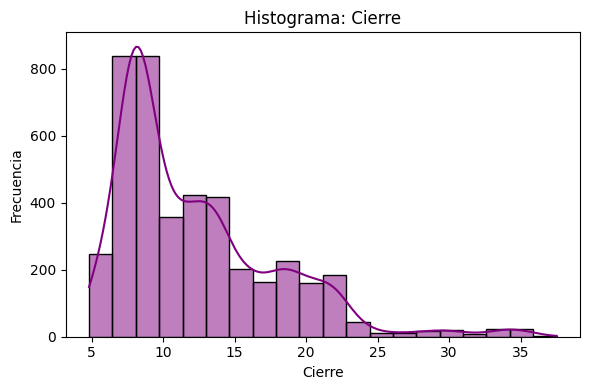

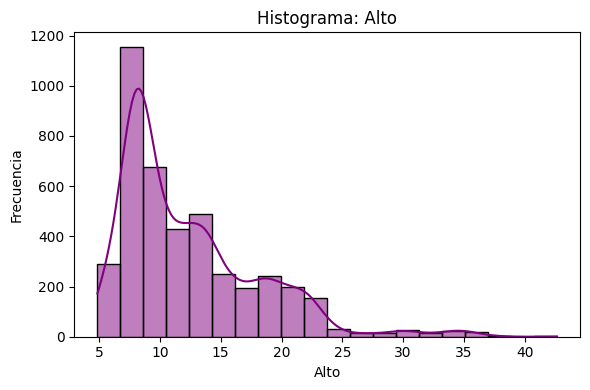

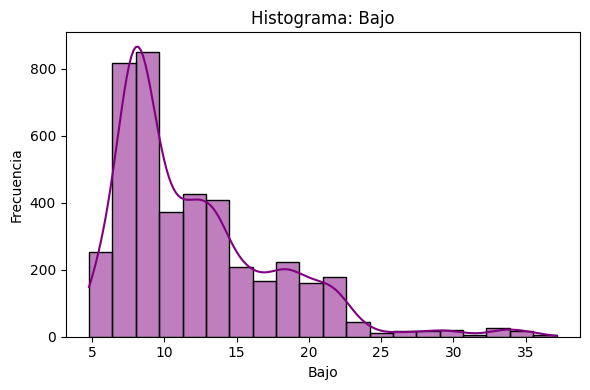

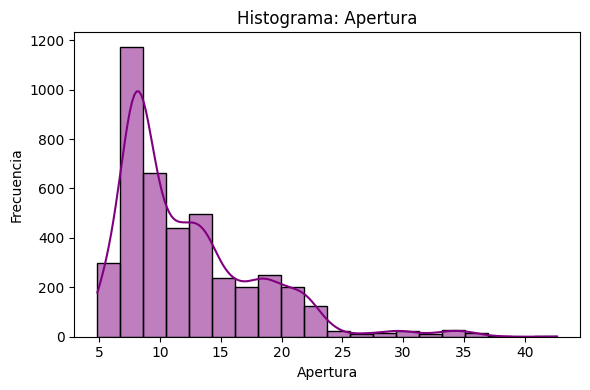

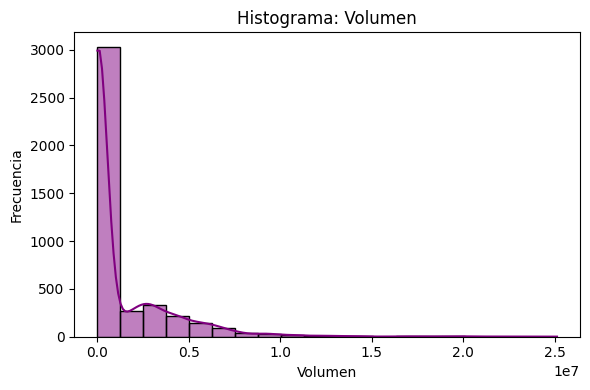

<ipython-input-53-c44803a6e0f0>:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':


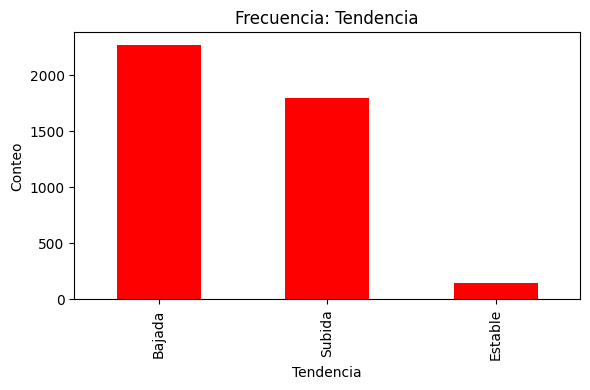

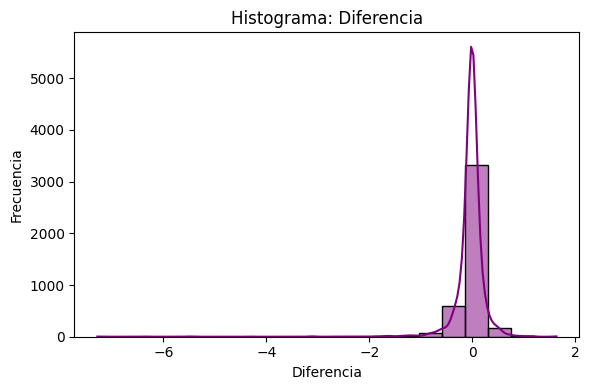

In [57]:
graf_info(df_ICLN, "purple", "red")

# Cox Energy America

In [46]:
print(df_COX.describe())

           Cierre        Alto        Bajo    Apertura        Volumen  \
count  154.000000  154.000000  154.000000  154.000000     154.000000   
mean    30.744935   30.789805   30.542208   30.583896    9245.175325   
std      4.036020    4.049801    3.957287    3.971263   42327.068586   
min     18.500000   18.500000   18.500000   18.500000       0.000000   
25%     29.500000   29.500000   29.112500   29.112500     360.500000   
50%     31.799999   31.799999   31.530001   31.530001    1248.000000   
75%     33.000000   33.000000   32.880001   32.880001    6983.750000   
max     38.099998   38.099998   38.099998   38.099998  510763.000000   

       Diferencia  
count  154.000000  
mean     0.161039  
std      0.611573  
min     -1.480000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      3.790001  


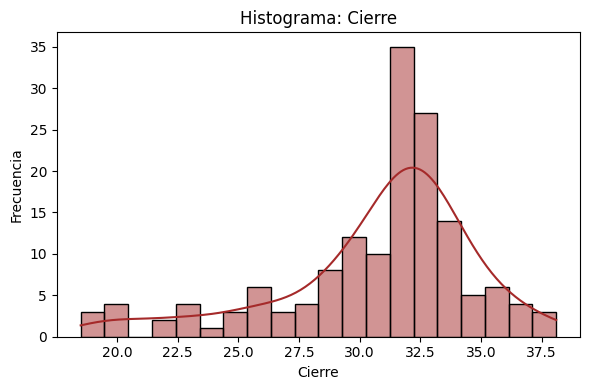

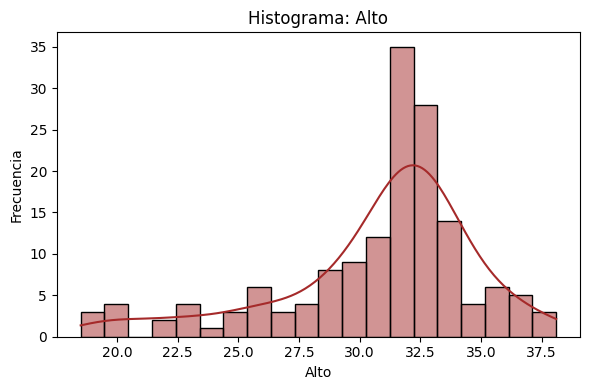

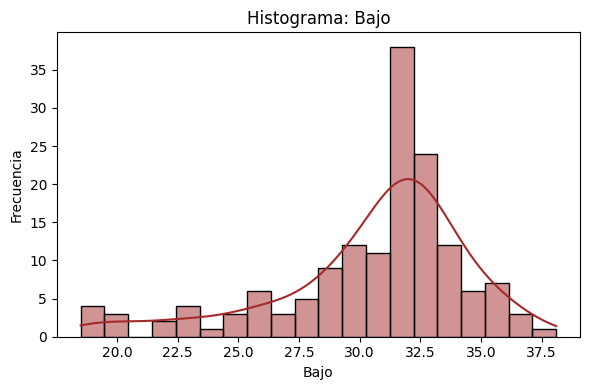

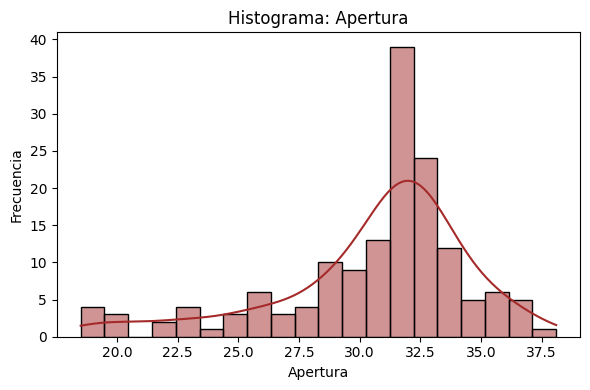

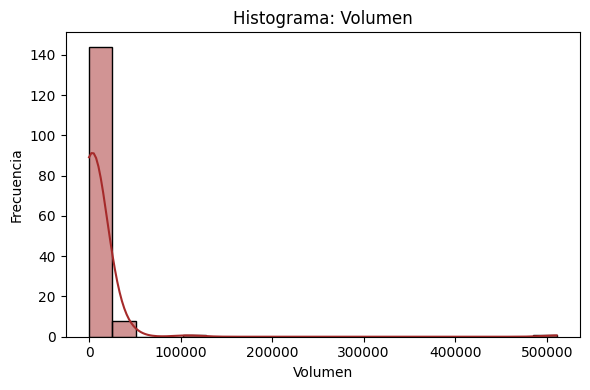

<ipython-input-53-c44803a6e0f0>:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':


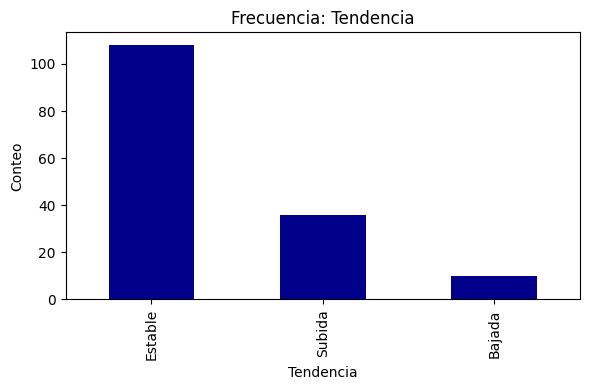

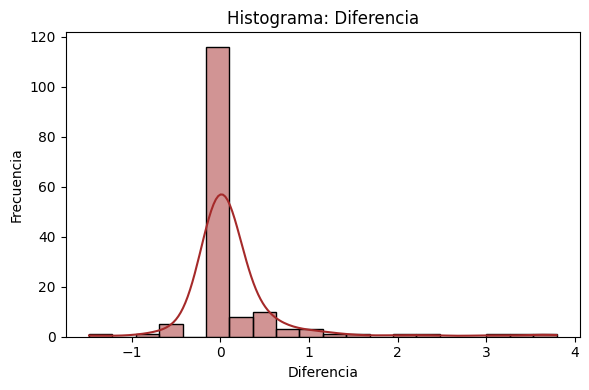

In [67]:
graf_info(df_COX, "brown", "darkblue")

# Sempra Energy

In [68]:
print(df_SRE.describe())

            Cierre         Alto         Bajo     Apertura       Volumen  \
count  6731.000000  6731.000000  6731.000000  6731.000000  6.731000e+03   
mean     29.805262    30.070684    29.522571    29.801436  2.605331e+06   
std      23.132681    23.341596    22.921350    23.137768  1.721868e+06   
min       3.556853     3.599219     3.427827     3.546483  9.340000e+04   
25%      10.145269    10.251186    10.063833    10.163362  1.608100e+06   
50%      18.152840    18.299235    18.006947    18.149807  2.276400e+06   
75%      46.101168    46.526377    45.739925    46.107026  3.162250e+06   
max      93.273819    94.258032    92.850607    94.051348  2.951370e+07   

        Diferencia  
count  6731.000000  
mean      0.003827  
std       0.475990  
min      -5.112262  
25%      -0.117481  
50%       0.010129  
75%       0.139680  
max       6.653279  


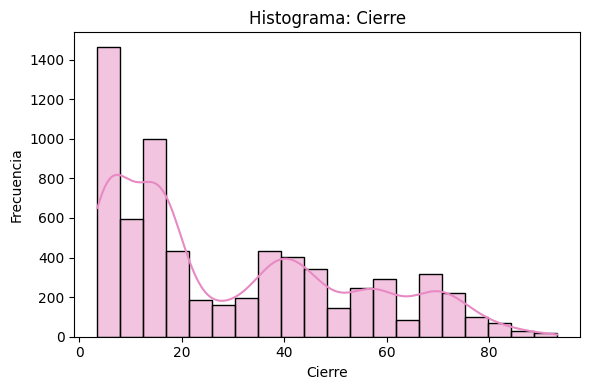

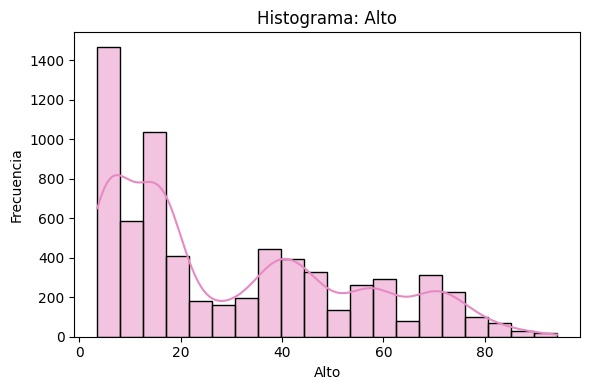

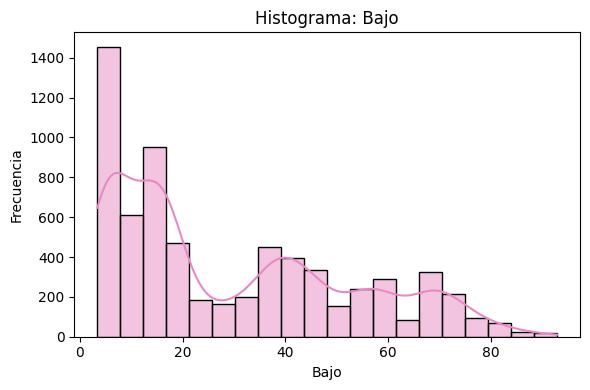

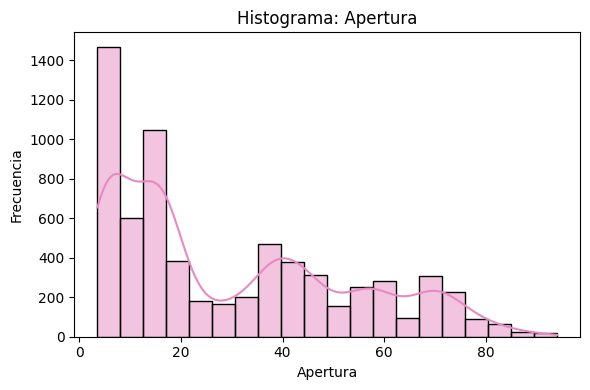

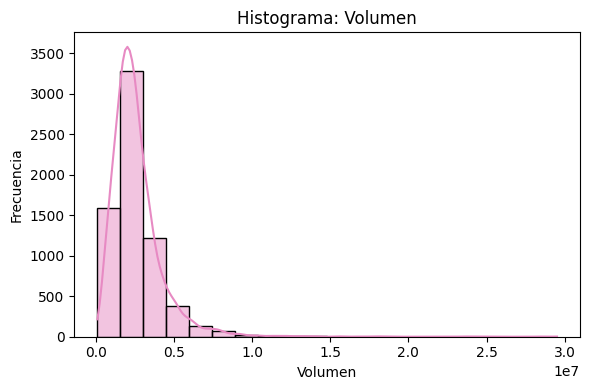

<ipython-input-53-c44803a6e0f0>:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':


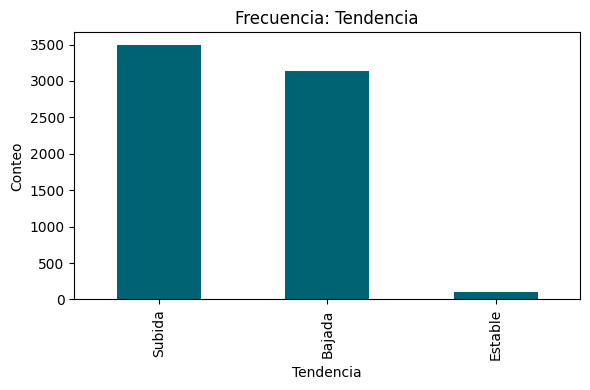

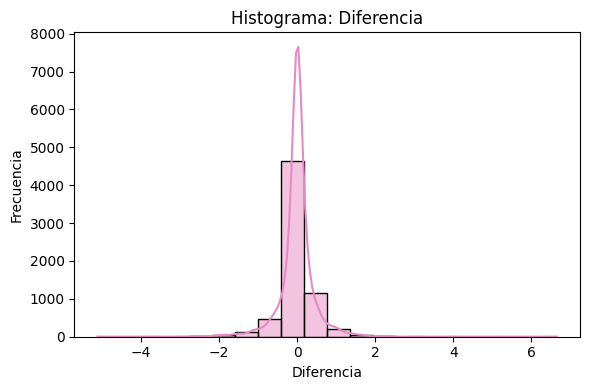

In [84]:
graf_info(df_SRE, sns.color_palette('Set2')[3], sns.color_palette('dark')[9])

#Correlaciones

In [94]:
def corr(df, nombre=''):
    # Seleccionamos solo las columnas numéricas
    df_numerico = df.select_dtypes(include='number')

    # Calculamos la matriz de correlación
    corr = df_numerico.corr()

    # Visualización
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, vmin = -1, vmax = 1, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(nombre, fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

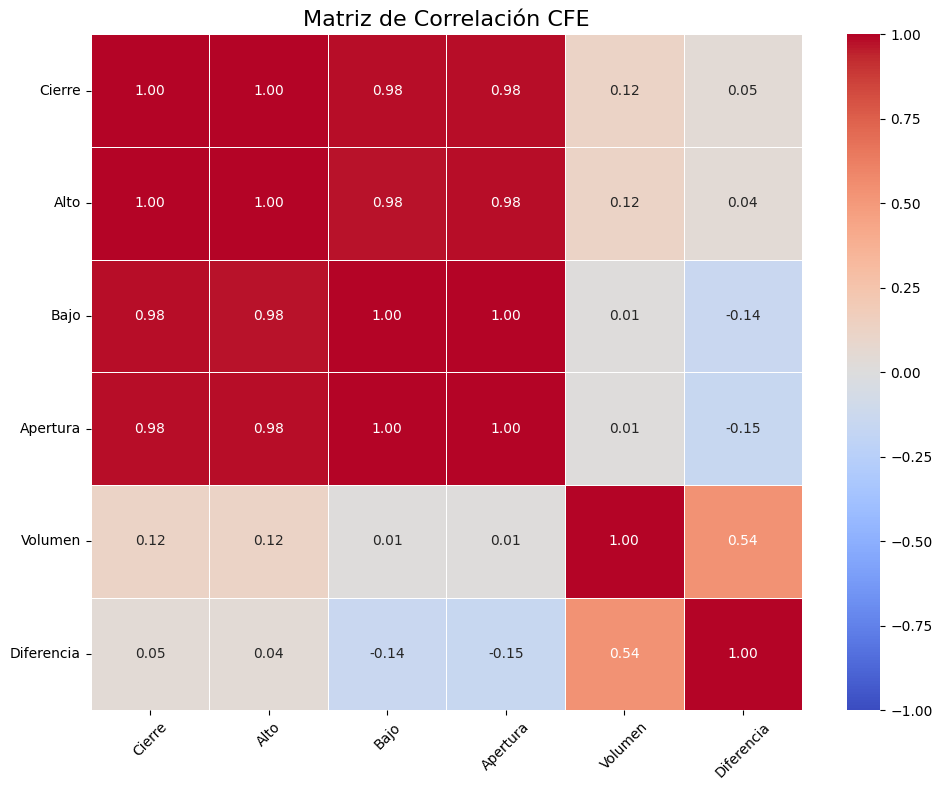

In [95]:
corr(df_CFE,"Matriz de Correlación CFE")

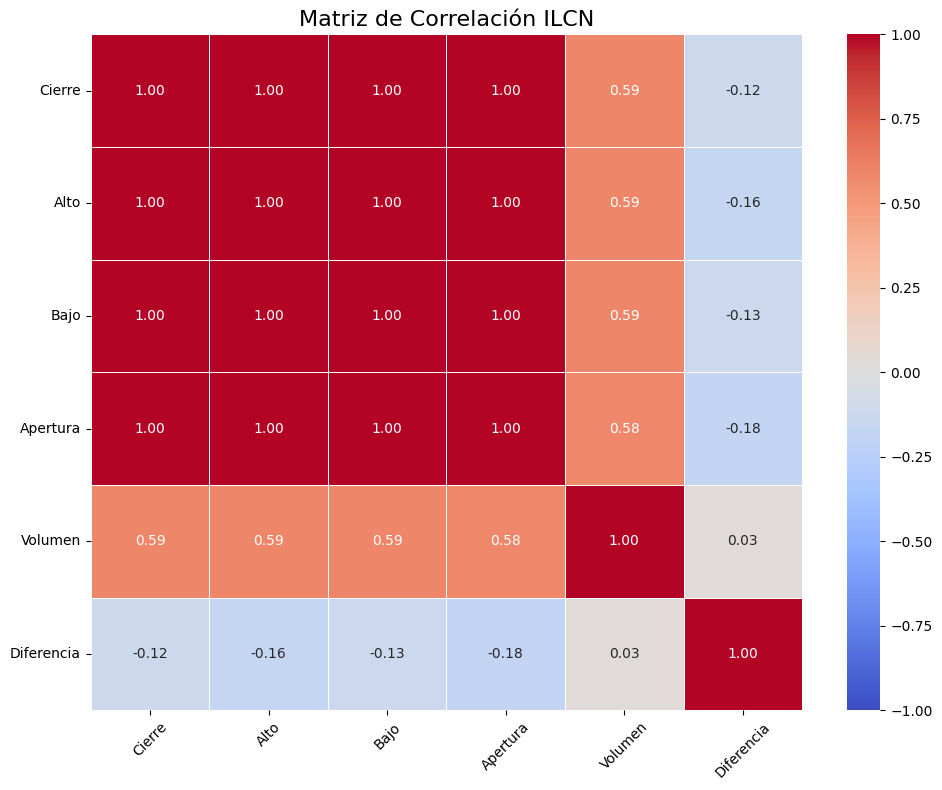

In [96]:
corr(df_ICLN,"Matriz de Correlación ILCN")

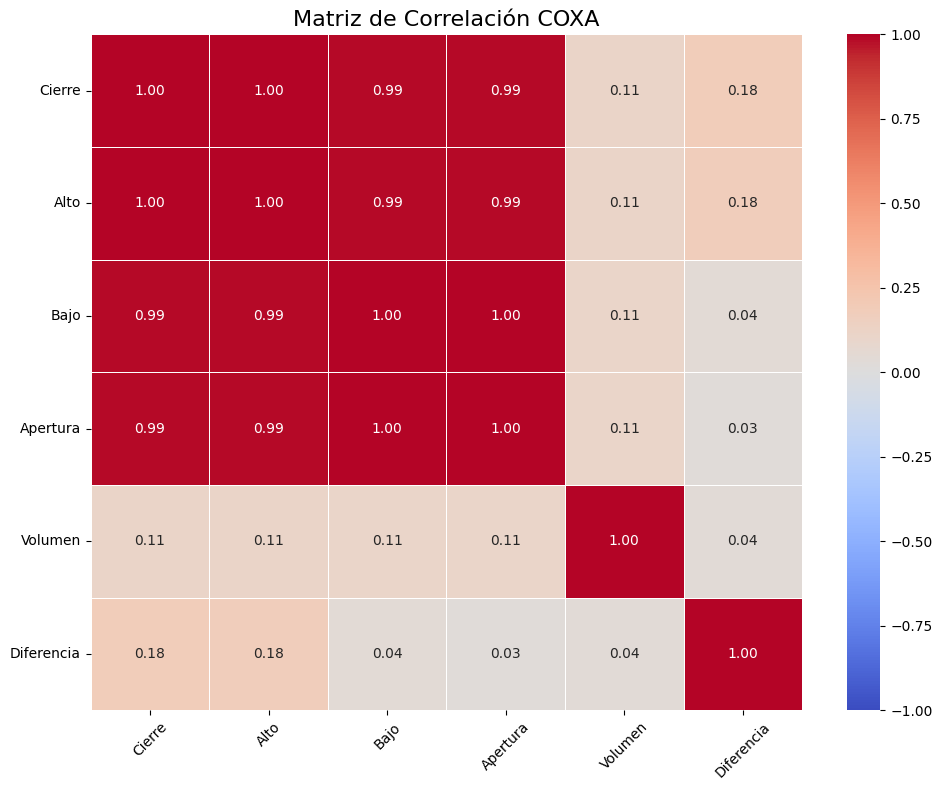

In [97]:
corr(df_COX, "Matriz de Correlación COX")

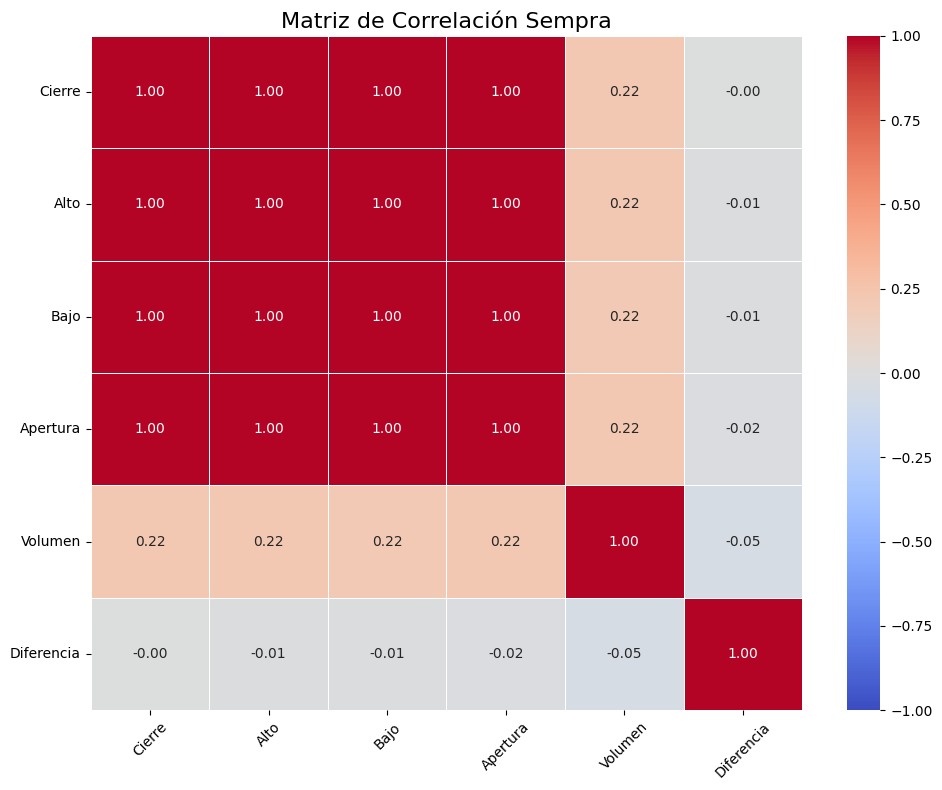

In [98]:
corr(df_SRE, "Matriz de Correlación Sempra")

In [99]:
def correlacion_conjunta(dataframes: dict):
  # Combinar todos los DataFrames en uno solo con prefijos en columnas
    df_total = pd.DataFrame()

    for nombre, df in dataframes.items():
        df_numerico = df.select_dtypes(include='number')
        df_numerico_prefijado = df_numerico.add_prefix(f'{nombre}_')
        df_total = pd.concat([df_total, df_numerico_prefijado], axis=1)

    # Calcular la matriz de correlación
    corr = df_total.corr()

    # Graficar
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Matriz de Correlación Conjunta", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

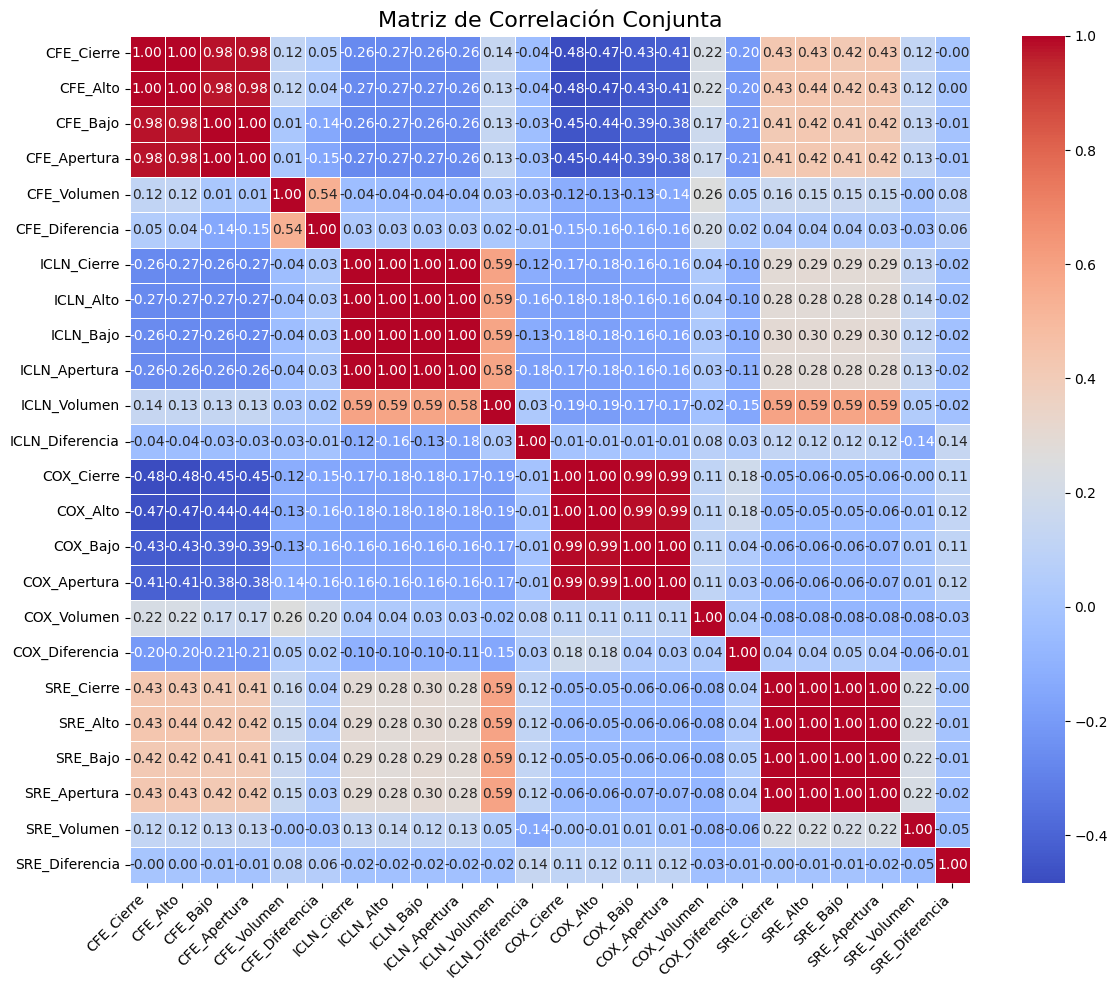

In [100]:
dataframes = {
    'CFE': df_CFE,
    'ICLN': df_ICLN,
    'COX': df_COX,
    'SRE': df_SRE
}

correlacion_conjunta(dataframes)